# Learning and Decision Making

## Laboratory 0: Introduction to scientific computation with Python

Each lab handout will consist of a Jupyter notebook like the present one, and will initiate with the following saying:

_"In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Make sure that the resulting script includes all code written in the tasks marked as "Activity n. XXX", together with any replies to specific questions posed. Your file should be named `padi-lab1-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>._

_Make sure..._

* _... that the subject is of the form `[<group n.>] LAB <lab n.>`._

* _... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions._

_In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed)."_

Today you can disregard the saying above ☺️

### 1. Basic interaction

When you are programming in a Jupyter notebook such as this, you will observe blocks of text preceeded by `In [ ]:` and `Out [ ]:`. These are blocks where you can insert Python code (the "In" blocks), and whose result you can observe as you press "Shift+Enter" (in the "Out" blocks).

For example, try that in the block below.

In [1]:
s = "Hello, world!"
print(s)

Hello, world!


Since you are programming in Python, all your standard primitives are available. You can use conditionals, cycles, inputs and outputs, etc. You also have available all standard Python modules.

In [ ]:
import math

a = 0

# Print a radian --> degree conversion table
while a < 2 * math.pi: 
    print(a, "radians correspond to", a * 90 / math.pi, "degrees.")
    a = a + 0.5

a = input("Please insert a number:\n>> ")

for i in range(5):
    a = math.sqrt(float(a))
    print("Next square root:", a)

if a > 1:
    print(a, "is larger than 1.") 
else: 
    print(a, "is smaller than or equal to 1.")

And, of course, you can define functions.

In [ ]:
def square(x):
    return x * x

print(square(2))

One important aspect that you should keep in mind is that running a notebook such as this one essentially corresponds to a sequential interaction with the Python interpreter---namely, the same scope rules apply. In particular, if you define a variable in a certain "In" block and run that block, that same variable will be accessible in posterior evaluations. Therefore, to avoid strange outputs resulting from "legacy" evaluations make sure that you evaluate the "In" blocks in sequence (by pressing Shift+Enter in each block) from scratch.

In [ ]:
print("The variable s is accessible here:", s)

### 2. Matrices

In your scientific computation you will use three main python libraries: **numpy**, **scipy** and **matplotlib**. The first contains a large collection of numeric types and functions, particularly for matrix manipulation. The second contains a large number of scientific computation utilities (such as optimization sub-modules, etc.). Finally, the third includes plotting functionalities. 

Your work in these labs will involve some level of data manipulation which is done, essentially, in the form of matrix manipulation. In particular, you will use the vast number of matrix manipulation operations offered by **numpy** that, if used proficiently, render computations significantly faster.

Matrices in **numpy** are represented by the type `numpy.array`. The array is initialized as a list of lists, each corresponding to a row of the matrix. There are also several commands to create particular
matrices, such as the identity (`eye`), an all-zeros matrix (`zeros`) or an all-ones matrix (`ones`). Note that, although a `numpy.matrix` type also exists, **we will not use it** and rather rely on the simpler `numpy.array`.

In [2]:
import numpy as np

A1 = np.array([[1, 2, 3], [4, 5, 6]])
print("2 x 3 array of numbers:")
print(A1)
print("This array is of dimension", A1.shape)

A2 = np.eye(3)
print("3 x 3 identity:")
print(A2)
print("This array is of dimension", A2.shape)

A3 = np.zeros((2, 3))
print("2 x 3 array of zeros:")
print(A3)
print("This array is of dimension", A3.shape)

A4 = np.ones(4);
print("4 x 0 array of ones (note how there is no second dimension):")
print(A4)
print("This array is of dimension", A4.shape)

2 x 3 array of numbers:
[[1 2 3]
 [4 5 6]]
This array is of dimension (2, 3)
3 x 3 identity:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
This array is of dimension (3, 3)
2 x 3 array of zeros:
[[0. 0. 0.]
 [0. 0. 0.]]
This array is of dimension (2, 3)
4 x 0 array of ones (note how there is no second dimension):
[1. 1. 1. 1.]
This array is of dimension (4,)


You can now easily perform standard algebraic operations, such as matrix sums or products. You can also perform indexing, slicing, and other operations, as illustrated in the following examples.

In [3]:
# = Matrix creation = #

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("3 x 3 matrix:")
print(A)

B = np.arange(1,4)
print("Vector with all numbers between 1 and 3:")
print(B)

C = np.diag(B)
print("Diagonal matrix built from the vector B:")
print(C)

# = Matrix operations = #

# Sum
D = A + np.eye(3)
print("A + I:")
print(D)

# Vector transpose and regular matrix product
E = np.dot(A, B.T)
print("A * B':")
print(E)

# Matrix inverse
F = np.linalg.inv(D)
print("inv(D):")
print(F)

# = Matrix concatenation = #

G = np.append([1, 2, 3], A)
print("Append matrix A to vector [1, 2, 3]:")
print(G)

# When the axis to append is specified, the 
# matrices/vectors must have the correct shape

H1 = np.append(A, [[10, 11, 12]], axis = 0)
H2 = np.append(A, [[4], [7], [10]], axis = 1)
print("Append [10, 11, 12] to A:")
print(H1)

print("Append [[4], [7], [10]] to A:")
print(H2)

# = Matrix indexing = #

# Simple indexing
print("A[0]:", A[0])
print("A[1]:", A[1])
print("A[1, 2]:", A[1, 2])  # More efficient
print("A[0][2]:", A[0][2])  # Less efficient

# -- Slicing

# Rows between 1 and 2 (excluding the latter), 
# columns between 0 and 1 (excluding the latter)
print("A[1:2,0:1]:", A[1:2,0:1])

# All rows except the last two,
# every other column
print("A[:-2,::2]:", A[:-2][::2]) 

I = np.arange(10, 1, -1)
print("Vector with numbers between 10 and 1:")
print(I)

# -- Matrices as indices

# Indexing with a list
print("I[[3, 3, 1, 8]]:", I[np.array([3, 3, 1, 8])])

# Indexing with an nparray
print("I[np.array([3, 3, -3, 8])]:", I[np.array([3, 3, -3, 8])])

# Indexing with an npmatrix
print("I[np.array([[1, 1], [2, 3]])]:", I[np.array([[1, 1], [2, 3]])]) 

3 x 3 matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Vector with all numbers between 1 and 3:
[1 2 3]
Diagonal matrix built from the vector B:
[[1 0 0]
 [0 2 0]
 [0 0 3]]
A + I:
[[ 2.  2.  3.]
 [ 4.  6.  6.]
 [ 7.  8. 10.]]
A * B':
[14 32 50]
inv(D):
[[-6.  -2.   3. ]
 [-1.   0.5  0. ]
 [ 5.   1.  -2. ]]
Append matrix A to vector [1, 2, 3]:
[1 2 3 1 2 3 4 5 6 7 8 9]
Append [10, 11, 12] to A:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Append [[4], [7], [10]] to A:
[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]
A[0]: [1 2 3]
A[1]: [4 5 6]
A[1, 2]: 6
A[0][2]: 3
A[1:2,0:1]: [[4]]
A[:-2,::2]: [[1 2 3]]
Vector with numbers between 10 and 1:
[10  9  8  7  6  5  4  3  2]
I[[3, 3, 1, 8]]: [7 7 9 2]
I[np.array([3, 3, -3, 8])]: [7 7 4 2]
I[np.array([[1, 1], [2, 3]])]: [[9 9]
 [8 7]]


Several observations are in order:

* The function `diag` can be used to build a diagonal matrix from a vector or extract a diagonal from a matrix. You can know more about this (and other) functions in numpy in the corresponding documentation or by using the help function. For example, to know more about the `diag` function, you can type `help("numpy.diag")` in the Python prompt, to get something like:

```
>>> help("numpy.diag")
Help on function diag in numpy:

numpy.diag = diag(v, k=0)
    Extract a diagonal or construct a diagonal array.
    
    See the more detailed documentation for ``numpy.diagonal`` if you use this
    function to extract a diagonal and wish to write to the resulting array;
    whether it returns a copy or a view depends on what version of numpy you
    are using.
    
    Parameters
    ----------
    v : array_like
        If `v` is a 2-D array, return a copy of its `k`-th diagonal.
        If `v` is a 1-D array, return a 2-D array with `v` on the `k`-th
        diagonal.
    k : int, optional
        Diagonal in question. The default is 0. Use `k>0` for diagonals
        above the main diagonal, and `k<0` for diagonals below the main
        diagonal.
    
    Returns
    -------
    out : ndarray
        The extracted diagonal or constructed diagonal array.
    
    See Also
    --------
    diagonal : Return specified diagonals.
    diagflat : Create a 2-D array with the flattened input as a diagonal.
    trace : Sum along diagonals.
    triu : Upper triangle of an array.
    tril : Lower triangle of an array.
    
    Examples
    --------
    >>> x = np.arange(9).reshape((3,3))
    >>> x
    array([[0, 1, 2],
           [3, 4, 5],
           [6, 7, 8]])
    
    >>> np.diag(x)
    array([0, 4, 8])
    >>> np.diag(x, k=1)
    array([1, 5])
    >>> np.diag(x, k=-1)
    array([3, 7])
    
    >>> np.diag(np.diag(x))
    array([[0, 0, 0],
           [0, 4, 0],
           [0, 0, 8]])
```

* You can add, multiply, transpose, invert matrices much as you would in linear algebra
* Indexing and slicing are quite powerful operations. For example, you can use a matrix to index another.

The ability to leverage the powerful indexing and vectorization capabilities of **numpy** is key to producing efficient code. It takes some time to get used to this programming philosophy, but once you do, you will notice an  improvement in the performance of your code. The impact of good vectorization in the efficiency of your code is illustrated in the following example.

In [ ]:
import numpy.random as rnd
import time

A = rnd.rand(1000,1000)
B = rnd.rand(1000,1000);
C = np.zeros((1000,1000));

t = time.time()

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        C[i, j] = A[i, j] + B[i, j]
    
t1 = time.time() - t

t = time.time()
C = A + B;
t2 = time.time() - t

print("Computation time with cycle (in seconds):", t1)
print("Computation time with numpy operation (in seconds):", t2)

Besides illustrating the importance of optimizing your code to take full advantage of its matrix manipulation capabilities, the previous example introduces several additional elements of the **numpy** syntax, such as:

* The `rand` function from the **numpy.random** module
* The `shape` attribute

The labs will consist of activities, marked in blocks titled **Activity XXX** like the one below. The activities in the lab today are just for fun---think of them as puzzles that allow you to practice some `numpy` programming. As such, no submission is necessary.

---

#### Activity 1.        

Compare the time necessary to compute the cumulative sum of a 10,000 &times; 1 random vector using:

* a for loop;
* a vectorized operation.

For the latter, you may find useful the function `cumsum`.

---

In [12]:
import numpy.random as rnd
import time

A = rnd.rand(10000)
t = time.time()

cyclesum = 0
for i in range(A.shape[0]):
    cumsum += A[i]

t1 = time.time() - t

t = time.time()
cumsum = np.cumsum(A)
t2 = time.time() - t

print("Computation time with cycle (in seconds):", t1)
print("Computation time with numpy operation (in seconds):", t2)

Computation time with cycle (in seconds): 0.0035247802734375
Computation time with numpy operation (in seconds): 0.00030994415283203125


---

#### Activity 2.

Compute in 20 &times; 1 vector $y$ where the $n$th entry is given by:

$$ y_n=\prod_{i=1}^n\sum_{j=1}^ij^3 $$

You should use no cycles in your computation.

**Suggestion**: Check the numpy function `cumprod`.

---

In [18]:
A = np.arange(1,21,1)
B = np.power(A,3)
C = np.cumsum(B)
D = np.cumprod(C)
print(D)

[                   1                    9                  324
                32400              7290000           3214890000
        2520473760000     3266533992960000  6614731335744000000
 -5155029349263503360 -5620307687296319488  6311543146700931072
  6262837011250479104  1614981141680422912 -5615836749654654976
  3099357445986713600  1814011203312156672  9112384135812349952
 -3719763636600700928  5318673408131596288]


### 3. Plotting

The Python module **matplotlib** offers a number of plotting routines that are ideal to display scientific data. The following generates 100 perturbed samples from the function

$$f(x) = 2x$$

and uses these samples to estimate the function $f$.

<IPython.core.display.Javascript object>


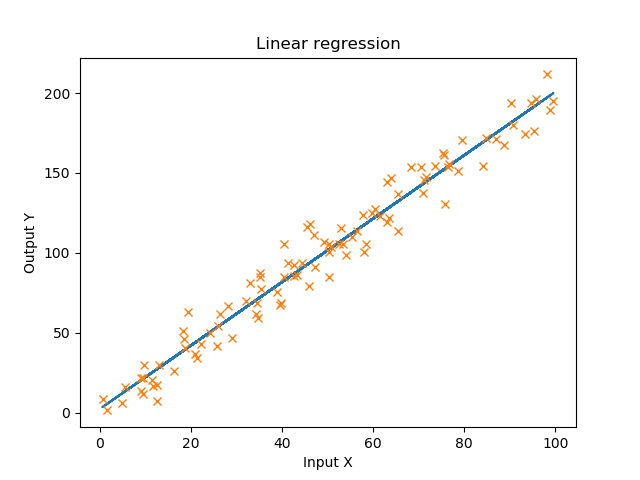

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Create data
x = 100 * rnd.rand(100, 1)
y = 2 * x + 10 * rnd.randn(100, 1)

# Estimate linear relation between X and Y

X = np.append(x, np.ones((100,1)), axis = 1)

f_est = np.dot(np.linalg.pinv(X), y)
y_est = np.dot(X, f_est)

# Plot commands

plt.figure()
plt.plot(x, y_est)
plt.plot(x, y, 'x')

plt.xlabel('Input X');
plt.ylabel('Output Y');

plt.title('Linear regression');

Consider more carefully the piece of code above, where we included line numbers for easier reference.

* On lines 5 and 6, the vectors *x* and *y* are created, using mostly functionalities that you already encountered in Sections 1 and 2. The novelty is the function `randn` which is similar to the function `rand` except on their underlying distribution: while `rand` generates random numbers uniformly from the interval [0, 1], `randn` generates normally distributed random numbers with mean 0 and a standard deviation of 1.

* Lines 10-13 estimate a linear relation between *x* and *y* using the data already created. Do not worry about the actual computations, and simply observe the use of matrix concatenation in line 10, and the `pinv` function in line 12. The function `pinv` computes the Moore-Penrose pseudo-inverse of a matrix (see [https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse])

* Lines 17 through 24 contain the actual plotting commands. In particular:

  * The figure command in line 17 creates a new figure.

  * The plot command in line 18 is responsible for displaying the continuous line in the plot. In here, it is used with its most basic syntax. However, the plot command has a very rich syntax, and you can type `help("mplotlib.pyplot.plot")` to know more about this useful function.
  
  * To avoid subsequent plot commands to erase the existing plot, we turn on the "hold" option to True in the first plot command (line 18).
  
  * The plot command in line 19 plots the original data. Note how the line specification 'x' indicates that, unlike the plot in line 18, this data should not be plotted continuously but instead marking each data-point with an "&times;".
  
* Finally, the commands in lines 21 to 24 are used to include additional information in the plot, such as the labels for both axis and the title for the plot.

---

#### Activity 3.

Recall the definition of $y_n$ in Activity 2:

$$ y_n=\prod_{i=1}^n\sum_{j=1}^ij^3 $$

Plot the value of $y$ against $n$ for $n$ between 1 and 20 (inclusive) using a *linear plot* (obtained
with the command `plot`) and a *logarithmic plot* (using the command `semilogy`). Stack both plots together using the command `subplot`, and comment on the observed differences.

What would you argue to be the usefulness of semi-logarithmic plots?

---

In [ ]:
# Insert your code here

[Provide your answer here]

---

#### Activity 4

A hospital is conducting a study on obesity in adult men and, as part of that study, tested the age and body fat for 18 randomly selected adults, with the following results:

| **Age**       |  38  |  27  |  48  |  17  |  33  |  32  |  38  |  38  |  26  |  34  |  33  |  41  |  45  |  46  |  26  |  35  |  22  |  23  | 
| -------------:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
| ** Body fat** | 17.1 | 20.7 | 25.2 | 13.6 | 13.4 | 19.8 | 11.7 | 17.3 | 15.6 | 20.5 | 22.4 | 20.2 | 17.5 | 22.7 |  7.5 | 27.2 |  9.2 | 16.1 |

Write down the data above as two row-vectors `age` and `fat`, and replicate the procedure used to generate the plot above to estimate a linear relation between the two quantities. Plot the relation that you estimated against the real data.

---

In [ ]:
# Insert your code here